In [4]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
data_path = "train_set"

In [6]:
test_img_path = data_path + "/Potato___Early_blight/3a314933-9e92-4c90-acc2-656a04c591e7___RS_Early.B 8906.JPG"
test_img_path

'train_set/Potato___Early_blight/3a314933-9e92-4c90-acc2-656a04c591e7___RS_Early.B 8906.JPG'

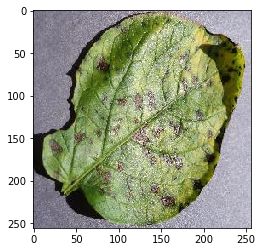

In [7]:
main_img = cv2.imread(test_img_path)
img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
img_rotate_90_clockwise = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
plt.imshow(img_rotate_90_clockwise)

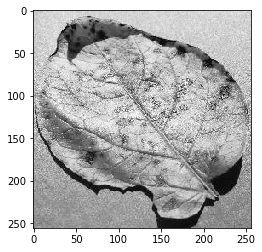

In [8]:
gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(gs,cmap='Greys_r')

In [9]:
gs.shape

(256, 256)

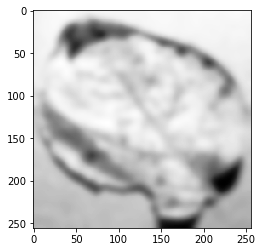

In [10]:
blur = cv2.GaussianBlur(gs, (25,25),0)
plt.imshow(blur,cmap='Greys_r')

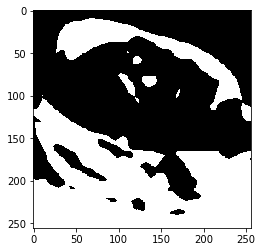

In [11]:
ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(im_bw_otsu,cmap='Greys_r')

In [12]:
kernel = np.ones((50,50),np.uint8)
closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)

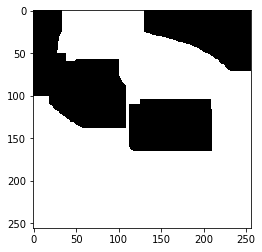

In [13]:
plt.imshow(closing,cmap='Greys_r')

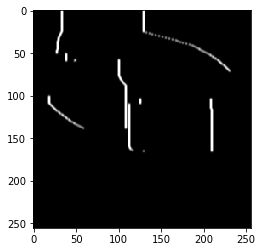

In [14]:
sobelx64f = cv2.Sobel(closing,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)
plt.imshow(abs_sobel64f,cmap='Greys_r')

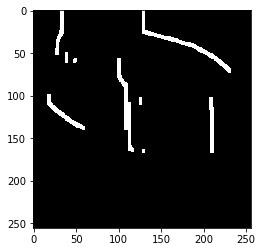

In [15]:
ret_sobel,im_bw_sobel = cv2.threshold(sobel_8u,1,255,cv2.THRESH_BINARY)
plt.imshow(im_bw_sobel,cmap='Greys_r')

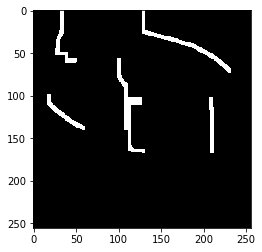

In [16]:
kernel_edge = np.ones((15,15),np.uint8)
closing_edge = cv2.morphologyEx(im_bw_sobel, cv2.MORPH_CLOSE, kernel_edge)
plt.imshow(closing_edge,cmap='Greys_r')

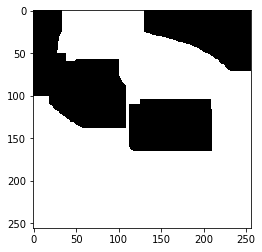

In [17]:
plt.imshow(closing,cmap="Greys_r")

In [18]:
contours, hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [19]:
len(contours)

2

In [20]:
cnt = contours[0]
len(cnt)

123

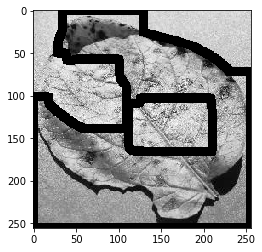

In [21]:
plottedContour = cv2.drawContours(gs,contours,-1,(0,255,0),10)
plt.imshow(plottedContour,cmap="Greys_r")

In [22]:
M = cv2.moments(cnt)
M

{'m00': 49598.0,
 'm10': 6579288.833333333,
 'm01': 7367226.5,
 'm20': 1116165426.5,
 'm11': 978091068.25,
 'm02': 1330383907.1666665,
 'm30': 210925132545.35,
 'm21': 168825464451.13333,
 'm12': 173797384792.03333,
 'm03': 261764735095.65002,
 'mu20': 243407622.7090268,
 'mu11': 811519.7987033129,
 'mu02': 236065057.56986308,
 'mu30': -1713942312.4993591,
 'mu21': 2816311767.680809,
 'mu12': -2922186255.1980286,
 'mu03': -5978501965.466309,
 'nu20': 0.09894773248218015,
 'nu11': 0.00032989124601934754,
 'nu02': 0.09596290331768247,
 'nu30': -0.003128497338058978,
 'nu21': 0.0051406770251708105,
 'nu12': -0.005333932101465045,
 'nu03': -0.01091269370511483}

In [23]:
area = cv2.contourArea(cnt)
area

49598.0

In [24]:
perimeter = cv2.arcLength(cnt,True)
perimeter

1205.7644991874695

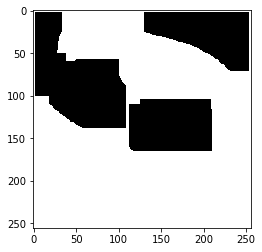

In [25]:
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
contours_im = cv2.drawContours(closing,[box],0,(255,255,255),2)
plt.imshow(contours_im,cmap="Greys_r")

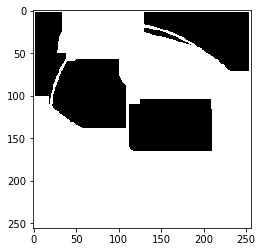

In [26]:
ellipse = cv2.fitEllipse(cnt)
im = cv2.ellipse(closing,ellipse,(255,255,255),2)
plt.imshow(closing,cmap="Greys_r")

In [27]:
x,y,w,h = cv2.boundingRect(cnt)
aspect_ratio = float(w)/h
aspect_ratio

1.0

In [28]:
rectangularity = w*h/area
rectangularity

1.3213436025646195

In [29]:
circularity = ((perimeter)**2)/area
circularity

29.313037370474802

In [30]:
equi_diameter = np.sqrt(4*area/np.pi)
equi_diameter

251.2969059494657

In [31]:
(x,y),(MA,ma),angle = cv2.fitEllipse(cnt)

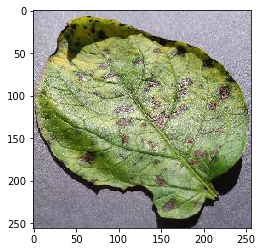

In [32]:
plt.imshow(img,cmap="Greys_r")

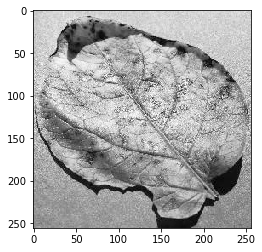

In [33]:
red_channel = img[:,:,0]
plt.imshow(red_channel,cmap="Greys_r")

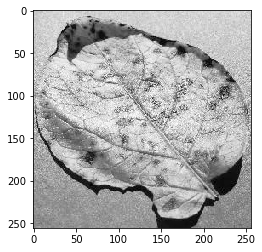

In [34]:
green_channel = img[:,:,1]
plt.imshow(green_channel,cmap="Greys_r")

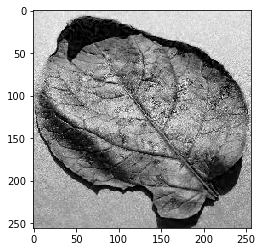

In [35]:
blue_channel = img[:,:,2]
plt.imshow(blue_channel,cmap="Greys_r")

In [36]:
np.mean(blue_channel)

115.19979858398438

In [37]:
blue_channel[blue_channel == 255] = 0
green_channel[green_channel == 255] = 0
red_channel[red_channel == 255] = 0

In [38]:
red_mean = np.mean(red_channel)
red_mean

138.09243774414062

In [39]:
green_mean = np.mean(green_channel)
green_mean

144.30230712890625

In [40]:
blue_mean = np.mean(blue_channel)
blue_mean

115.18812561035156

In [41]:
red_var = np.std(red_channel)
red_var

47.68237213316762

In [42]:
import mahotas as mt

ModuleNotFoundError: No module named 'mahotas'

In [390]:
textures = mt.features.haralick(gs)
ht_mean = textures.mean(axis=0)
ht_mean

array([ 5.47662081e-03,  2.08798807e+02,  9.69001012e-01,  3.36781602e+03,
        3.00663216e-01,  2.59686163e+02,  1.32624653e+04,  8.08477930e+00,
        1.14129791e+01,  3.89969100e-04,  3.82654513e+00, -3.98943277e-01,
        9.98054668e-01])

In [391]:
print(ht_mean[1]) #contrast
print(ht_mean[2]) #correlation
print(ht_mean[4]) #inverse difference moments
print(ht_mean[8]) #entropy

208.7988074236652
0.9690010123243838
0.30066321572608423
11.412979122646776
